## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [3]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
#spam_data.head()
# spam_data.describe()
#spam_data.info()

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [4]:
spam_data.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,0.104553,0.305358,0,0.000,0.000,0.000,4.540
word_freq_address,4601,0.213015,1.290575,0,0.000,0.000,0.000,14.280
word_freq_all,4601,0.280656,0.504143,0,0.000,0.000,0.420,5.100
word_freq_3d,4601,0.065425,1.395151,0,0.000,0.000,0.000,42.810
word_freq_our,4601,0.312223,0.672513,0,0.000,0.000,0.380,10.000
word_freq_over,4601,0.095901,0.273824,0,0.000,0.000,0.000,5.880
word_freq_remove,4601,0.114208,0.391441,0,0.000,0.000,0.000,7.270
word_freq_internet,4601,0.105295,0.401071,0,0.000,0.000,0.000,11.110
word_freq_order,4601,0.090067,0.278616,0,0.000,0.000,0.000,5.260
word_freq_mail,4601,0.239413,0.644755,0,0.000,0.000,0.160,18.180


In [5]:
spam_data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0

In [6]:
#sns.pairplot(spam_data, size = 1.2, aspect=1.75)

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [7]:
import statsmodels.formula.api as smf

In [8]:
spam_data.columns[:spam_data.shape[1]-1]

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all', u'word_freq_3d', u'word_freq_our', u'word_freq_over', u'word_freq_remove', u'word_freq_internet', u'word_freq_order', u'word_freq_mail', u'word_freq_receive', u'word_freq_will', u'word_freq_people', u'word_freq_report', u'word_freq_addresses', u'word_freq_free', u'word_freq_business', u'word_freq_email', u'word_freq_you', u'word_freq_credit', u'word_freq_your', u'word_freq_font', u'word_freq_000', u'word_freq_money', u'word_freq_hp', u'word_freq_hpl', u'word_freq_george', u'word_freq_650', u'word_freq_lab', u'word_freq_labs', u'word_freq_telnet', u'word_freq_857', u'word_freq_data', u'word_freq_415', u'word_freq_85', u'word_freq_technology', u'word_freq_1999', u'word_freq_parts', u'word_freq_pm', u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting', u'word_freq_original', u'word_freq_project', u'word_freq_re', u'word_freq_edu', u'word_freq_table', u'word_freq_conference', u'char_freq_;', u'char_freq_(', u'char_freq

In [9]:
train_cols = spam_data.columns[:spam_data.shape[1]-1]

In [10]:
logit = smf.Logit(spam_data["is_spam"], spam_data[train_cols])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.212842
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4544
Method:                           MLE   Df Model:                           56
Date:                Tue, 10 Mar 2015   Pseudo R-squ.:                  0.6826
Time:                        19:50:10   Log-Likelihood:                -979.29
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
word_freq_make                -0.4925      0.204     -2.414      0.016        -0.892    -0.093
word_freq_address             -0.2455      0.066     -3.728      0.000        -0.375    -0.116
word_freq_all                 -0.0881      0.109     -0.811      0.417        -0.301     0.125
word_freq_3d                   2.0840      1.441      1.447      0.148        -0.739     4.908
word_freq_our                  0.3643      0.099      3.679      0.000         0.170     0.558
word_freq_over                 0.5346      0.240      2.229      0.026         0.064     1.005
word_freq_remove               2.1275      0.327      6.501      0.000         1.486     2.769
word_freq_internet             0.4187      0.144      2.901      0.004         0.136     0.702
word_freq_order                0.5012      0.270      1.860      0.063        -0.027     1.029
word_freq_mail                 0.0377      0.068      0.555      0.579        -0.095     0.171
word_freq_receive             -0.1094      0.291     -0.376      0.707        -0.680     0.461
word_freq_will                -0.3316      0.072     -4.615      0.000        -0.472    -0.191
word_freq_people              -0.3511      0.216     -1.627      0.104        -0.774     0.072
word_freq_report              -0.0540      0.135     -0.399      0.690        -0.319     0.211
word_freq_addresses            1.4374      0.750      1.916      0.055        -0.033     2.907
word_freq_free                 0.8798      0.143      6.149      0.000         0.599     1.160
word_freq_business             0.8914      0.225      3.956      0.000         0.450     1.333
word_freq_email               -0.0107      0.110     -0.097      0.923        -0.227     0.205
word_freq_you                 -0.0830      0.032     -2.612      0.009        -0.145    -0.021
word_freq_credit               1.1846      0.554      2.139      0.032         0.099     2.270
word_freq_your                 0.1524      0.051      2.986      0.003         0.052     0.252
word_freq_font                 0.1957      0.186      1.054      0.292        -0.168     0.560
word_freq_000                  2.1029      0.462      4.551      0.000         1.197     3.009
word_freq_money                0.4031      0.166      2.426      0.015         0.077     0.729
word_freq_hp                  -2.2495      0.319     -7.052      0.000        -2.875    -1.624
word_freq_hpl                 -1.1445      0.436     -2.626      0.009        -1.999    -0.290
word_freq_george              -8.8352      1.649     -5.358      0.000       -12.067    -5.603
word_freq_650                  0.4550      0.203      2.244      0.025         0.058     0.852
word_freq_lab                 -3.5130      1.722     -2.040      0.041        -6.888    -0.138
word_freq_labs                -0.4937      0.322     -1.534      0.125        -1.124     0.137
word_freq_telnet              -0.3485      0.654     -0.533      0.594        -1.631     0.934
word_freq_8

In [11]:
logit = smf.Logit(spam_data["is_spam"], spam_data["capital_run_length_longest"])
result2 = logit.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.661246
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4600
Method:                           MLE   Df Model:                            0
Date:                Tue, 10 Mar 2015   Pseudo R-squ.:                 0.01384
Time:                        19:50:11   Log-Likelihood:                -3042.4
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                       nan
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
capital_run_length_longest     0.0069      0.001     12.155      0.000         0.006     0.008
==============================================================================================
"""

In [12]:
#This variable is not very accurate by itself as the pseudo r-squared value is very low.

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [13]:
from sklearn.cross_validation import train_test_split, cross_val_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(spam_data[train_cols], spam_data["is_spam"], test_size=0.3, random_state=12)

In [15]:
logit = smf.Logit(y_train, X_train)
result3 = logit.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.206731
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3220
Model:                          Logit   Df Residuals:                     3163
Method:                           MLE   Df Model:                           56
Date:                Tue, 10 Mar 2015   Pseudo R-squ.:                  0.6928
Time:                        19:50:11   Log-Likelihood:                -665.67
converged:                       True   LL-Null:                       -2166.7
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.6916      0.275     -2.511      0.012        -1.231    -0.152
x2            -0.2482      0.081     -3.056      0.002        -0.407    -0.089
x3            -0.1582      0.131     -1.212      0.226        -0.414     0.098
x4             2.1381      1.382      1.547      0.122        -0.571     4.847
x5             0.6320      0.137      4.610      0.000         0.363     0.901
x6             0.4819      0.270      1.787      0.074        -0.047     1.010
x7             1.8561      0.359      5.163      0.000         1.152     2.561
x8             0.1306      0.178      0.734      0.463        -0.218     0.479
x9             0.3066      0.316      0.970      0.332        -0.313     0.926
x10            0.2851      0.121      2.353      0.019         0.048     0.523
x11            0.1376      0.357      0.386      0.700        -0.562     0.837
x12           -0.4118      0.089     -4.652      0.000        -0.585    -0.238
x13           -0.3343      0.269     -1.244      0.213        -0.861     0.192
x14           -0.0309      0.215     -0.144      0.886        -0.453     0.391
x15            0.8323      0.729      1.141      0.254        -0.597     2.262
x16            0.7546      0.166      4.544      0.000         0.429     1.080
x17            0.8077      0.276      2.925      0.003         0.266     1.349
x18           -0.0139      0.124     -0.113      0.910        -0.256     0.228
x19           -0.0846      0.039     -2.152      0.031        -0.162    -0.008
x20            0.7856      0.538      1.461      0.144        -0.268     1.840
x21            0.2016      0.065      3.089      0.002         0.074     0.330
x22            0.3534      0.298      1.185      0.236        -0.231     0.938
x23            2.1372      0.557      3.836      0.000         1.045     3.229
x24            0.2140      0.151      1.416      0.157        -0.082     0.510
x25           -2.8178      0.480     -5.865      0.000        -3.759    -1.876
x26           -0.9252      0.553     -1.673      0.094        -2.009     0.159
x27           -7.7470      1.735     -4.465      0.000       -11.148    -4.346
x28            0.3064      0.232      1.321      0.186        -0.148     0.761
x29           -7.6650      4.723     -1.623      0.105       -16.921     1.591
x30           -0.9011      0.516     -1.746      0.081        -1.913     0.110
x31           -0.3275      0.593     -0.552      0.581        -1.489     0.834
x32            3.3566      4.660      0.720      0.471        -5.777    12.490
x33           -0.8888      0.333     -2.667      0.008        -1.542    -0.236
x34           -1.6268      5.623     -0.289      0.772       -12.649     9.395
x35           -1.9594      1.185     -1.654      0.098        -4.281     0.362
x36            0.4831      0.380      1.271      0.204        -0.262     1.228
x37           -0.0752      0.214     -0.351      0.726        -0.495     0.345
x38           -0.8269      0.675     -1.225      0.221        -2.150     0.496
x3

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your data

#### Use crossvalidation to score model

In [16]:
# Could not get logit working with cross_val_score, and so using LogisticRegression from scikit learn

from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm = lrm.fit(X_train, y_train)

# check the accuracy on the training set
lrm.score(X_train, y_train)

0.92701863354037262

In [17]:
scores = cross_val_score(LogisticRegression(), X_test, y_test, cv=5)
print scores

[ 0.92057762  0.93478261  0.9057971   0.91304348  0.93115942]


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [18]:
from sklearn import neighbors

In [19]:
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
scores = cross_val_score(clf, X_test, y_test, cv=5)
print scores

[ 0.72202166  0.76811594  0.76811594  0.71014493  0.72463768]


In [20]:
# the logistic regression model appears better as the cross validation scores are higher

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [21]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3220
Model:                          Logit   Df Residuals:                     3163
Method:                           MLE   Df Model:                           56
Date:                Tue, 10 Mar 2015   Pseudo R-squ.:                  0.6928
Time:                        19:50:20   Log-Likelihood:                -665.67
converged:                       True   LL-Null:                       -2166.7
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.6916      0.275     -2.511      0.012        -1.231    -0.152
x2            -0.2482      0.081     -3.056      0.002        -0.407    -0.089
x3            -0.1582      0.131     -1.212      0.226        -0.414     0.098
x4             2.1381      1.382      1.547      0.122        -0.571     4.847
x5             0.6320      0.137      4.610      0.000         0.363     0.901
x6             0.4819      0.270      1.787      0.074        -0.047     1.010
x7             1.8561      0.359      5.163      0.000         1.152     2.561
x8             0.1306      0.178      0.734      0.463        -0.218     0.479
x9             0.3066      0.316      0.970      0.332        -0.313     0.926
x10            0.2851      0.121      2.353      0.019         0.048     0.523
x11            0.1376      0.357      0.386      0.700        -0.562     0.837
x12           -0.4118      0.089     -4.652      0.000        -0.585    -0.238
x13           -0.3343      0.269     -1.244      0.213        -0.861     0.192
x14           -0.0309      0.215     -0.144      0.886        -0.453     0.391
x15            0.8323      0.729      1.141      0.254        -0.597     2.262
x16            0.7546      0.166      4.544      0.000         0.429     1.080
x17            0.8077      0.276      2.925      0.003         0.266     1.349
x18           -0.0139      0.124     -0.113      0.910        -0.256     0.228
x19           -0.0846      0.039     -2.152      0.031        -0.162    -0.008
x20            0.7856      0.538      1.461      0.144        -0.268     1.840
x21            0.2016      0.065      3.089      0.002         0.074     0.330
x22            0.3534      0.298      1.185      0.236        -0.231     0.938
x23            2.1372      0.557      3.836      0.000         1.045     3.229
x24            0.2140      0.151      1.416      0.157        -0.082     0.510
x25           -2.8178      0.480     -5.865      0.000        -3.759    -1.876
x26           -0.9252      0.553     -1.673      0.094        -2.009     0.159
x27           -7.7470      1.735     -4.465      0.000       -11.148    -4.346
x28            0.3064      0.232      1.321      0.186        -0.148     0.761
x29           -7.6650      4.723     -1.623      0.105       -16.921     1.591
x30           -0.9011      0.516     -1.746      0.081        -1.913     0.110
x31           -0.3275      0.593     -0.552      0.581        -1.489     0.834
x32            3.3566      4.660      0.720      0.471        -5.777    12.490
x33           -0.8888      0.333     -2.667      0.008        -1.542    -0.236
x34           -1.6268      5.623     -0.289      0.772       -12.649     9.395
x35           -1.9594      1.185     -1.654      0.098        -4.281     0.362
x36            0.4831      0.380      1.271      0.204        -0.262     1.228
x37           -0.0752      0.214     -0.351      0.726        -0.495     0.345
x38           -0.8269      0.675     -1.225      0.221        -2.150     0.496
x3

In [22]:
# Variables from above where p-value (P>|z|) is less than 0.05

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [23]:
import numpy as np
from seaborn import plt
from sklearn import linear_model 
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

In [24]:
# Run classifier
classifier = linear_model.LogisticRegression()

In [25]:
probas_ = lrm.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.968521


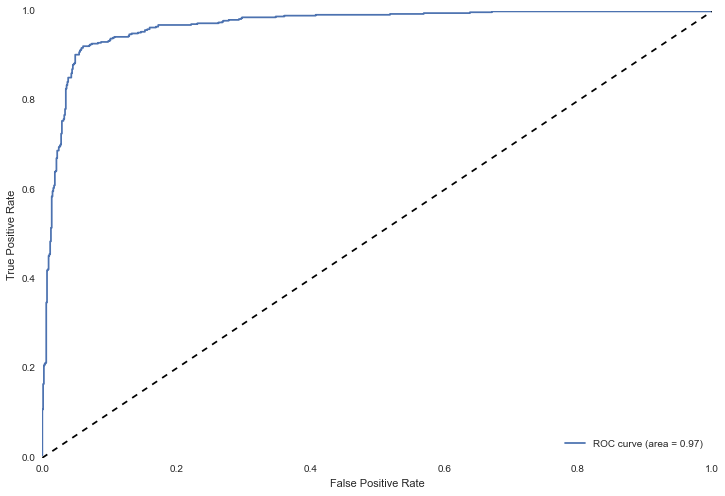

In [26]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)

clf.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [28]:
clf.score(X_test, y_test)

0.78638667632150616

In [29]:
clf.score(X_train, y_train)

0.79316770186335406

In [30]:
target_predicted_proba = clf.predict_proba(X_test)
pd.DataFrame(target_predicted_proba[:5], columns=spam_data[train_cols])

ValueError: Shape of passed values is (2, 5), indices imply (4601, 5)

In [31]:
def plot_roc_curve(target_test, target_predicted_proba, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

IndexError: index 2 is out of bounds for axis 1 with size 2

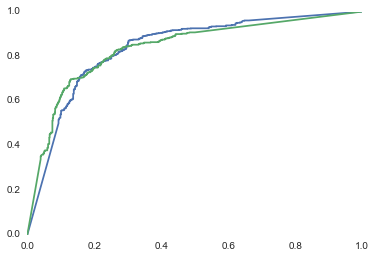

In [32]:
plot_roc_curve(y_test, target_predicted_proba, spam_data.is_spam)

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

As you move toward a threshold of 1, the number of false positive predictions of spam should approach zero. However, the number of false negative predictions will go up significantly. As you move the threshold from .5 down to 0, the number of false positive predictions of spam will go down, but the number of false negatives will go up. You need to determine what is an acceptable balance between the two options. 

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [33]:
X = spam_data[train_cols]
y = spam_data.is_spam

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=True)

In [35]:
pca.components_

array([[  7.29618966e-08,  -7.55892972e-08,   9.88736967e-08,
          8.12984502e-08,   9.22209989e-09,   6.14865374e-08,
         -5.20105218e-09,   4.38025193e-08,   1.86389095e-07,
          1.54653263e-07,   6.23432185e-08,   4.72810637e-08,
          8.35367059e-08,   1.49428705e-07,   1.09060911e-07,
          9.45108541e-09,   7.75984832e-08,   6.91283571e-08,
         -3.19994862e-08,   1.06821504e-07,   1.74915563e-07,
          2.79519169e-07,   1.56187959e-07,   9.53875453e-08,
         -1.98709447e-07,  -1.42972493e-07,  -8.65529236e-07,
         -9.69679759e-08,  -8.96793344e-08,  -7.81319798e-08,
         -4.94044670e-08,  -4.09940095e-08,   7.94434655e-09,
         -3.90253442e-08,  -6.54489911e-08,  -4.97688728e-08,
         -5.76368029e-09,  -8.21442060e-09,  -5.70881140e-08,
         -2.62833755e-08,  -2.57991889e-08,  -1.15657698e-07,
         -2.16656831e-08,  -6.75872689e-08,  -2.56797644e-07,
         -1.13392709e-07,   9.09340941e-10,  -8.07665456e-09,
        

In [36]:
# Information captured by various Principal Components
pca.explained_variance_ratio_

array([ 0.92702701,  0.07104297])

In [37]:
# Look at Total Information captured in the Principal Components
pca.explained_variance_ratio_.sum()

0.9980699846892197

In [38]:
# Transform the Data into Princial Component vectors
X_pca = pca.transform(X)

In [39]:
#your visualization here

In [40]:
# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

In [41]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

C:\Users\Jaime\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


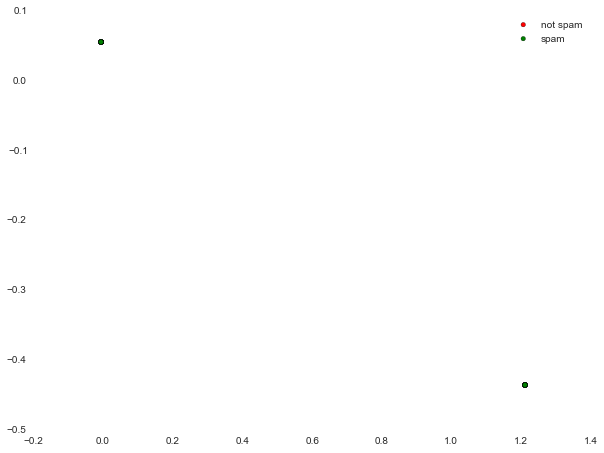

In [42]:
plot_PCA_2D(X_pca, y, ['not spam','spam'])